In [38]:
import pandas as pd
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
filterwarnings("ignore")
seed = 42
random.seed(seed)

test_set_size = 0.2

In [4]:
## Some dictionaries that are used in the analysis:
seasons_dict = {1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"}

year_dict = {0:"2018",1:"2019"}

month_dict = month = {1:'January',
		2:'February',
		3:'March',
		4:'April',
		5:'May',
		6:'June',
		7:'July',
		8:'August',
		9:'September',
		10:'October',
		11:'November',
		12:'December'}

day_dict = {6:"Mon", 0:"Tues", 1:"Wed", 2:"Thurs", 3:"Fri", 4:"Sat", 5:"Sun"}

# weather_dict = {1:"Clear",2:"Mist",3:"Light Snow", 4:"Heavy Snow"}

In [5]:
def read_file():
    data =  (pd.read_csv("day.csv"))
    print(data.head())

In [6]:
global data
data = pd.read_csv("day.csv")
data.drop(["instant","yr"],axis=1,inplace=True)
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


<h4> Data Preparation </h4>

<h4>Data Dictionary:</h4>

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [8]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
#dtday: Covert to datetime object.
data["dteday"] = pd.to_datetime(data["dteday"])

# Seasons: 
seasons = {1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"}
data["season"]  = data["season"].replace(seasons_dict)

#year
data["yr"] = data["yr"].replace({0:"2018",1:"2019"})

#Month:
data["mnth"] = data["mnth"].replace(month_dict)

#weekday
day_dict = {6:"Mon", 0:"Tues", 1:"Wed", 2:"Thurs", 3:"Fri", 4:"Sat", 5:"Sun"}
data["weekday"] = data["weekday"].replace(day_dict)

# Converting Weather Situation to Categorical variable.
data["weathersit"] = data.weathersit.astype("category")


#### Analysis of user count: 

In [10]:
count = data[["casual","registered","cnt"]]
count["total"] = count["casual"] + count["registered"]
count.sample(10)

,casual,registered,cnt,total
315,1275,2792,4067,4067
484,665,4907,5572,5572
335,268,3672,3940,3940
469,2846,4286,7132,7132
186,784,3845,4629,4629
153,898,4414,5312,5312
303,362,3307,3669,3669
193,748,3594,4342,4342
360,103,1059,1162,1162
424,325,4665,4990,4990


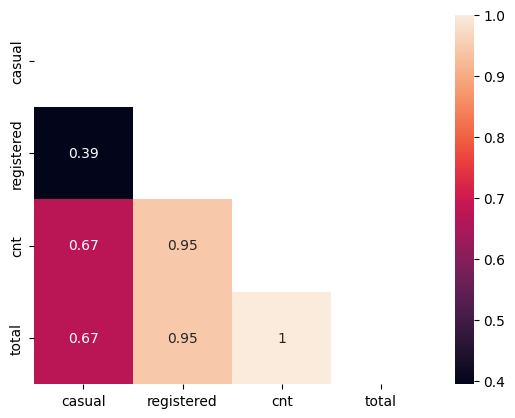

In [11]:
corr = count.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True,mask=mask);

**Conclusion**: <br>
Since "cnt" is simply the total value for Casual and Registered users, these columns are not helpful to predict the number of users.

count    730.000000
mean      17.578986
std       10.732371
min        1.320000
25%        9.952500
50%       14.885000
75%       21.505000
max       51.030000
Name: prop_casual_%, dtype: float64


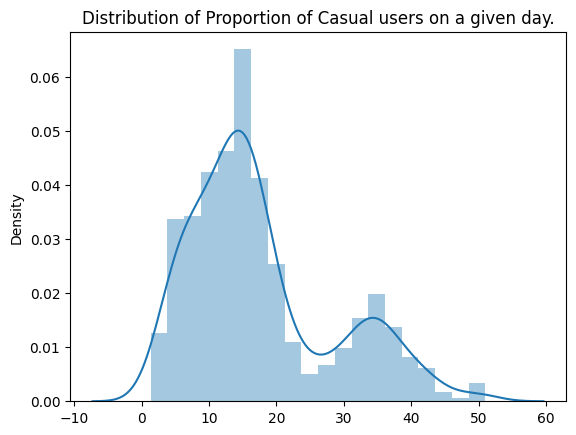

In [12]:
# Adding a column of ratio of Casual to Registered users. 
count["prop_casual_%"]  = round((count["casual"] / count["total"])*100,2)
print(count["prop_casual_%"].describe())
sns.distplot(x=count["prop_casual_%"])
plt.title("Distribution of Proportion of Casual users on a given day.");

### Univariate Analysis

Fall      0.257534
Summer    0.252055
Spring    0.246575
Winter    0.243836
Name: season, dtype: float64


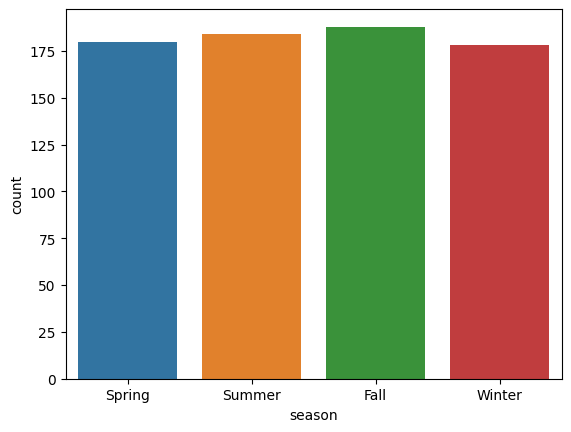

In [13]:
# Seasons
print(data["season"].value_counts(normalize=True))
sns.countplot(x=data["season"]);

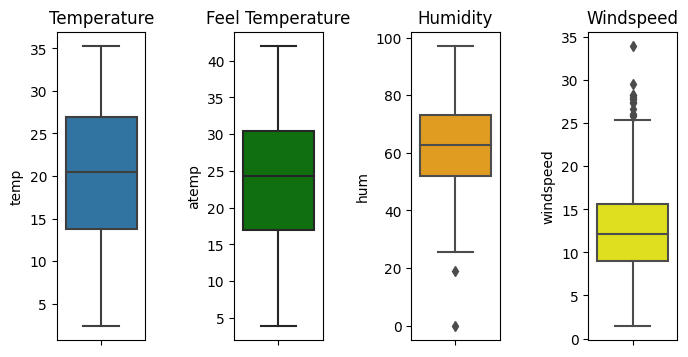

In [14]:
## Continuous variable analysis
fig,ax = plt.subplots(1,4,figsize=(8,4))

sns.boxplot(ax=ax[0], y =data["temp"]);
ax[0].set_title("Temperature")

sns.boxplot(ax=ax[1], y = data["atemp"],color='green');
ax[1].set_title("Feel Temperature")

sns.boxplot(ax=ax[2], y = data["hum"],color='orange');
ax[2].set_title("Humidity")

sns.boxplot(ax=ax[3], y = data["windspeed"],color='yellow');
ax[3].set_title("Windspeed")

fig.subplots_adjust(wspace=1)
plt.show();

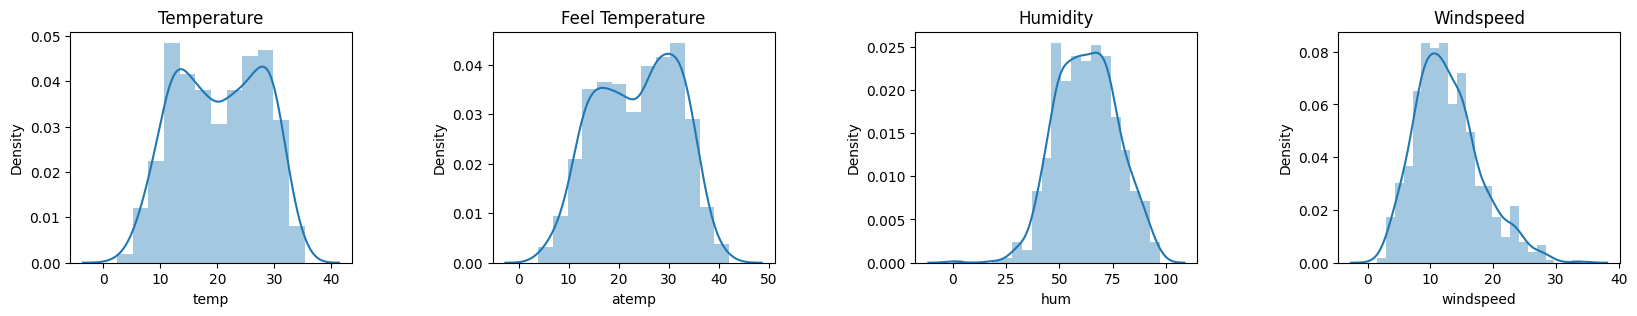

In [15]:
## Continuous variable analysis
fig,ax = plt.subplots(1,4,figsize=(20,3))

sns.distplot( data["temp"], ax=ax[0]);
ax[0].set_title("Temperature")

sns.distplot(data["atemp"], ax=ax[1]);
ax[1].set_title("Feel Temperature")

sns.distplot(data["hum"], ax=ax[2]);
ax[2].set_title("Humidity")

sns.distplot(data["windspeed"], ax=ax[3]);
ax[3].set_title("Windspeed")

fig.subplots_adjust(wspace=0.5)
plt.show();

**Conclusion**: <br>
- Temp & Feel Temp: What was expected was people to feel colder and hotter than the actual temperature but people seem to usually feel a little higher temperature than current temperature.
- Humidity and Windspeed: Humidity is normal as expected and there is nothing abnormal about Windspeed.


1    463
2    246
3     21
Name: weathersit, dtype: int64


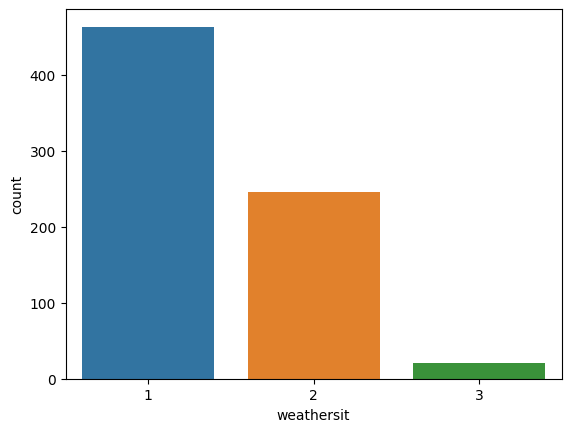

In [16]:
# Weather Situation:
print(data.weathersit.value_counts())
sns.countplot(x=data["weathersit"]);

**Conclusion**:
From the Data Dictionary, the numbers correspond to:
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

Logically, Weather situation #3 would see the least usage of bikes.

### Bivariate Analysis

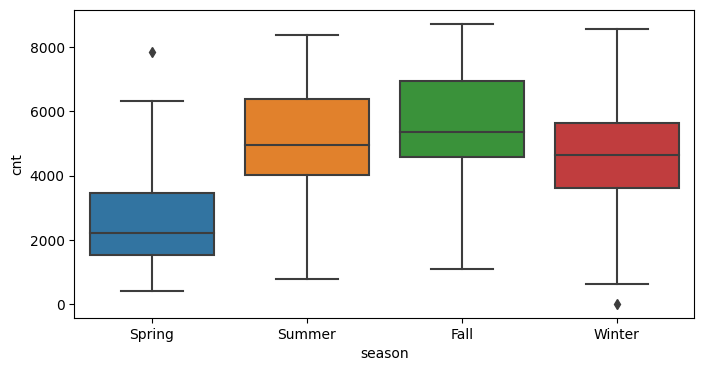

In [17]:
# Seasons vs Count
plt.figure(figsize=(8,4))
sns.boxplot(x=data["season"],y=data["cnt"]);

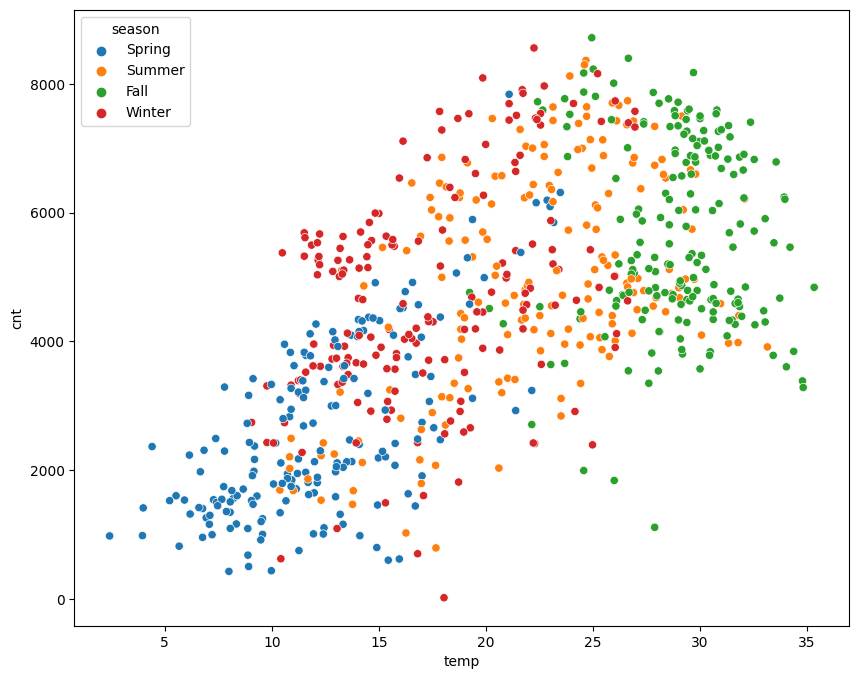

In [18]:
# Temperature vs Count
plt.figure(figsize=(10,8))
sns.scatterplot(x=data["temp"],y=data["cnt"],hue=data["season"]);

**Conclusion** :
- Highest user numbers are recorded for the temperature range of 20&deg;C to 30&deg;C

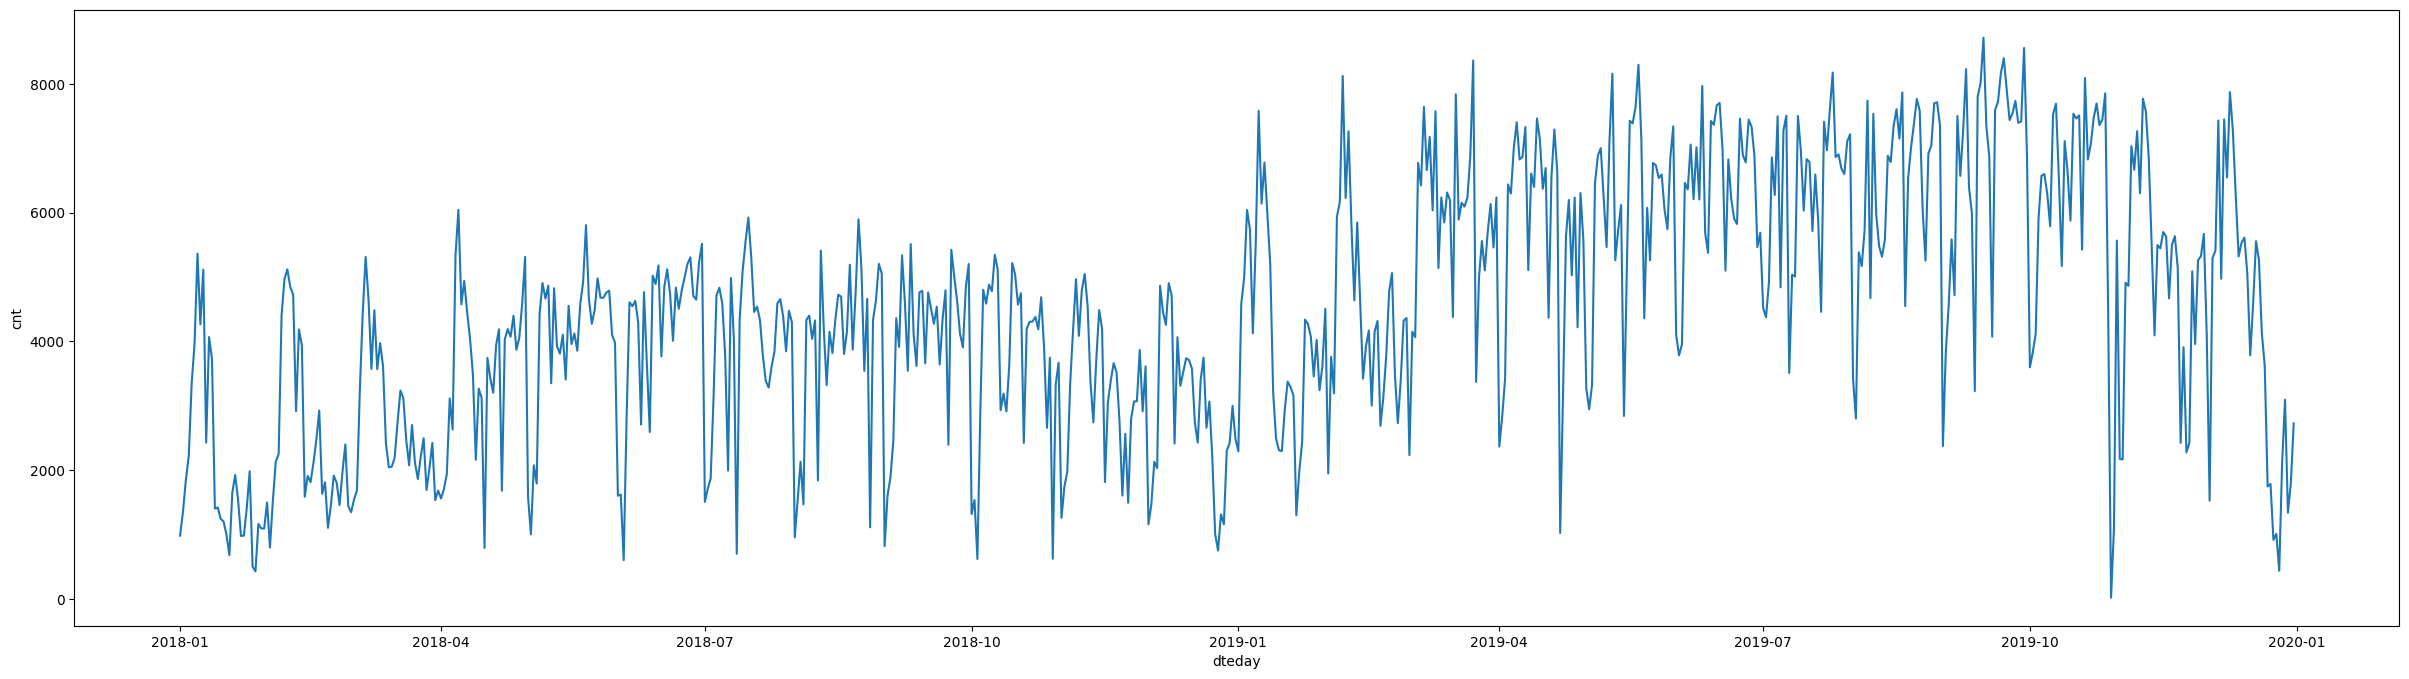

In [19]:
# Daily plot:
plt.figure(figsize=(30,8))
sns.lineplot(x=data["dteday"],y=data["cnt"]);

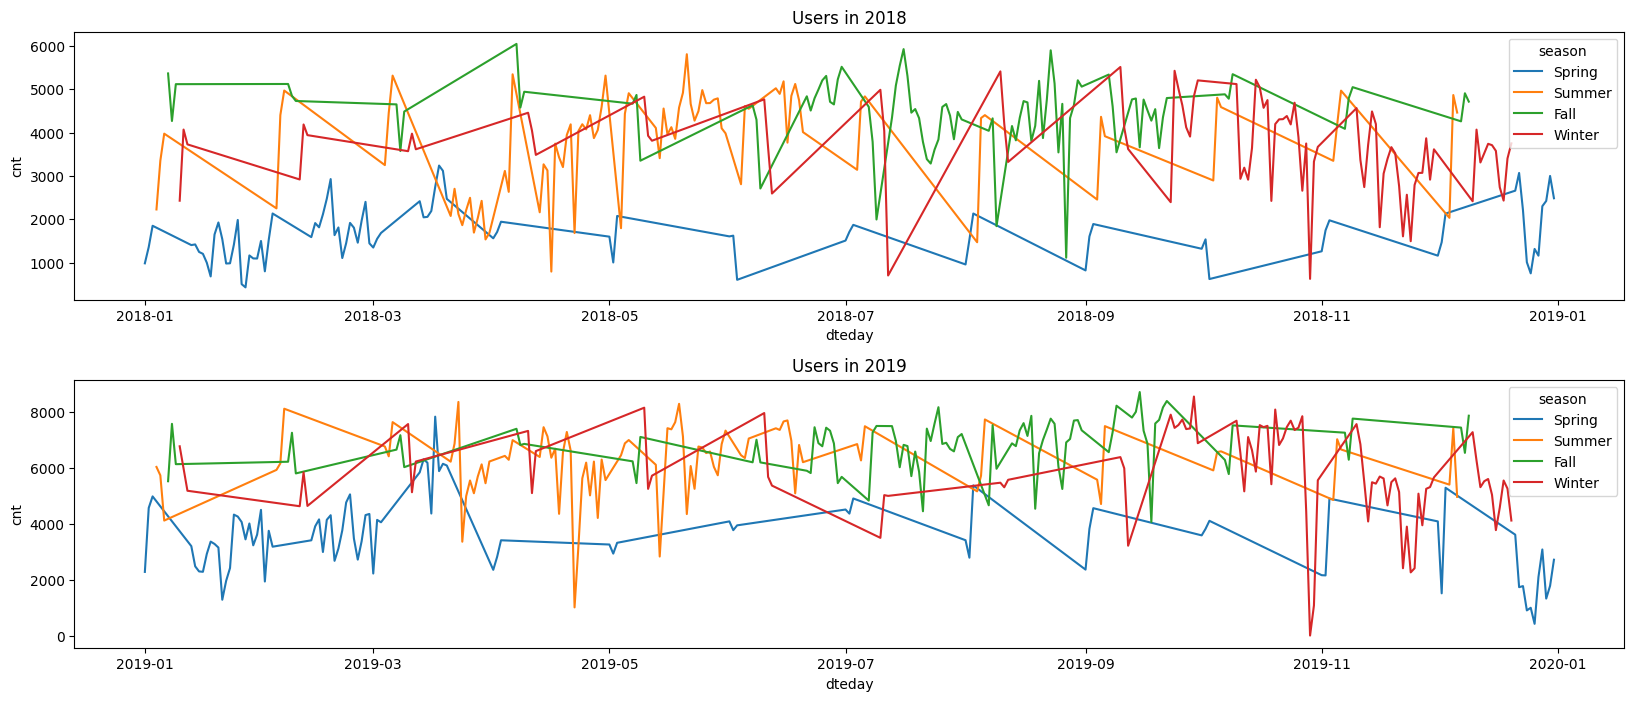

In [20]:
# Plotting users in 2018 and 2019
df_2018 = data[data.yr == "2018"]
df_2019 = data[data.yr == "2019"]

fig, ax = plt.subplots(2,1,figsize=(20,8))

ax[0].set_title("Users in 2018")
sns.lineplot(ax=ax[0],x=df_2018["dteday"], y=df_2018["cnt"],hue=df_2018["season"]);

ax[1].set_title("Users in 2019")
sns.lineplot(ax=ax[1],x=df_2019["dteday"], y=df_2019["cnt"],hue=df_2019["season"]);

fig.subplots_adjust(hspace=0.3); #Vertical Gap in subplots.

**Data Preparation for Modelling**:

In [23]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,Spring,2018,Janauary,0,Mon,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,Spring,2018,Janauary,0,Tues,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,Spring,2018,Janauary,0,Wed,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,Spring,2018,Janauary,0,Thurs,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,Spring,2018,Janauary,0,Fri,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [29]:
# Dropping the unnecessary columns.
cols_drop = ["instant","yr","casual","registered","dteday","yr","mnth","weekday"]
df = pd.read_csv("day.csv") 
df = df.drop(cols_drop,axis=1)
df.head()

,season,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [30]:
# Naming the categorical variables:
df["season"]  = df["season"].replace(seasons_dict)

# df["weathersit"] = df["weathersit"].replace()
# df["weekday"] = df["weekday"].replace(day_dict)
df.head()

,season,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,0,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [35]:
seasons = pd.get_dummies(df["season"],drop_first=True)
seasons

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [36]:
df = pd.concat([df,seasons],axis=1)
df.drop("season",axis=1,inplace=True)
df.head()

,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Spring,Summer,Winter
0,0,0,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0,1,0,0
1,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0,1,0,0
2,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,1,0,0
3,0,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,1,0,0
4,0,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,1,0,0


----

In [42]:
df_train, df_test = train_test_split(df,test_size=test_set_size,random_state=seed)

In [43]:
df_train.head()

,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Spring,Summer,Winter
247,1,0,2,27.606653,31.28230,79.0417,14.250632,3351,0,0,0,0,0,0
335,0,1,1,12.880847,16.57165,62.5833,6.750518,3940,0,0,1,0,0,1
702,0,1,1,19.509153,23.45270,73.3750,11.666643,6606,0,0,1,0,0,1
440,0,0,2,21.080847,25.25230,75.5833,7.417168,7836,1,0,0,1,0,0
136,0,1,2,23.028347,26.92645,83.7917,18.582718,4123,0,1,0,0,1,0
